## Single feature performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

It uses cross-validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

## Classification

In [2]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [5]:
# set up a machine learning model
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5,
)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=4,
                                                                  random_state=1),
                                 threshold=0.5)

In [6]:
#  the transformer stores a dictionary of feature:metric pairs
# in this case is the roc_auc of each individual model

sel.feature_performance_

{'var_1': 0.48759031722656787,
 'var_2': 0.5058495607868547,
 'var_3': 0.49058732764053187,
 'var_4': 0.5012796293993184,
 'var_5': 0.5015514668326605,
 'var_6': 0.5002474844829955,
 'var_7': 0.5053980551113001,
 'var_8': 0.5087168962585721,
 'var_9': 0.49864686314141937,
 'var_10': 0.5039410600373947,
 'var_11': 0.5045094416479241,
 'var_12': 0.5033327636363987,
 'var_13': 0.5012541384264105,
 'var_14': 0.5095504140994519,
 'var_15': 0.506701821891826,
 'var_16': 0.5770565890399896,
 'var_17': 0.4963289286105192,
 'var_18': 0.5023773600480498,
 'var_19': 0.5014485279442139,
 'var_20': 0.4951890067232388,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030892688459182,
 'var_23': 0.5031364087419122,
 'var_24': 0.4987179664947448,
 'var_25': 0.4971818735961501,
 'var_26': 0.4963324021204824,
 'var_27': 0.49770294484649696,
 'var_28': 0.5066253681740291,
 'var_29': 0.503312573897207,
 'var_30': 0.5062993948207423,
 'var_31': 0.49807697924090827,
 'var_32': 0.49568034884808415,
 'var_33': 0.

In [7]:
# from 2024, it also calculates the standard deviation

sel.feature_performance_std_

{'var_1': 0.005471105367839896,
 'var_2': 0.004326032968677819,
 'var_3': 0.004967102288802368,
 'var_4': 0.004142524212644274,
 'var_5': 0.0041483306569222314,
 'var_6': 0.0049354245177318165,
 'var_7': 0.003031262289056518,
 'var_8': 0.0023854434277390496,
 'var_9': 0.0021900866216929475,
 'var_10': 0.0023285006277699596,
 'var_11': 0.005305433446725634,
 'var_12': 0.001932422375052254,
 'var_13': 0.0029501904807575177,
 'var_14': 0.004957340579567309,
 'var_15': 0.0021450361029312697,
 'var_16': 0.0026637667036541637,
 'var_17': 0.0014790119580121246,
 'var_18': 0.0004751116724557414,
 'var_19': 0.0006049200073182149,
 'var_20': 0.0021110389166378953,
 'var_21': 0.0018043454294472973,
 'var_22': 0.004572642282815292,
 'var_23': 0.002130711150541077,
 'var_24': 0.002945981615024369,
 'var_25': 0.0011656739113303281,
 'var_26': 0.009573769236073717,
 'var_27': 0.0026633241484571224,
 'var_28': 0.006680642817495203,
 'var_29': 0.0010543730775813566,
 'var_30': 0.00210628167093445,
 'va

Text(0, 0.5, 'roc-auc')

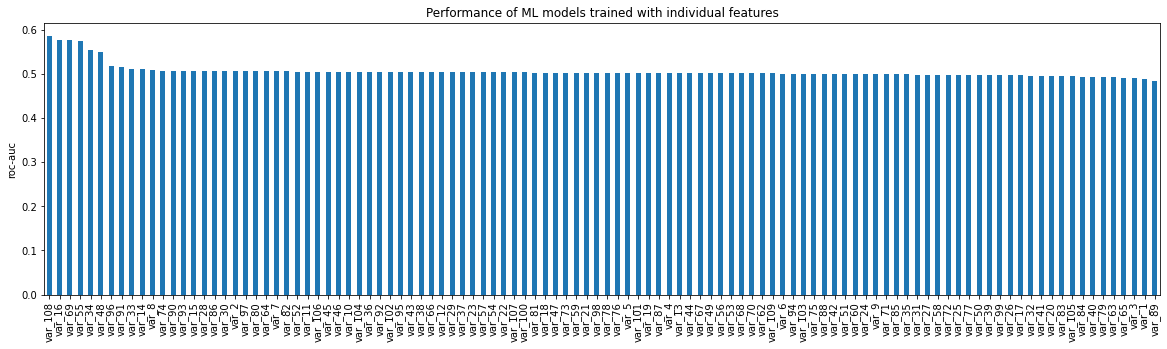

In [8]:
# we can plot feature importance sorted by importance

pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

In [9]:
# the features that will be removed

len(sel.features_to_drop_)

36

In [10]:
# remove non-prective features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

## Regression

In [11]:
# load dataset

data = pd.read_csv('../houseprice.csv')

data.shape

(1460, 81)

In [12]:
# I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [13]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# fill missing values
data.fillna(0, inplace=True)

In [15]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [16]:
# set up the machine learning model
rf = RandomForestRegressor(
    n_estimators=10, max_depth=2, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="r2",
    cv=3,
    threshold=0.5,
)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=2,
                                                                 n_estimators=10,
                                                                 n_jobs=4,
                                                                 random_state=1),
                                 scoring='r2', threshold=0.5)

In [17]:
# the transformer stores a dictionary of feature:metric pairs

sel.feature_performance_

{'MSSubClass': 0.1851403460198242,
 'LotFrontage': 0.11295437960824546,
 'LotArea': 0.18072827270865235,
 'OverallQual': 0.6390607189504983,
 'OverallCond': 0.10099732436450067,
 'YearBuilt': 0.3496918758852814,
 'YearRemodAdd': 0.26011141213081274,
 'MasVnrArea': 0.16739999652926915,
 'BsmtFinSF1': 0.19898086671343465,
 'BsmtFinSF2': -0.009703547431066162,
 'BsmtUnfSF': 0.05878832827833499,
 'TotalBsmtSF': 0.4067200681744638,
 '1stFlrSF': 0.34510202976681503,
 '2ndFlrSF': 0.21988067672483705,
 'LowQualFinSF': -0.025701997588528352,
 'GrLivArea': 0.47416720514000604,
 'BsmtFullBath': 0.03495762648889167,
 'BsmtHalfBath': -0.024767451129236395,
 'FullBath': 0.3300942150720977,
 'HalfBath': 0.07062920270257245,
 'BedroomAbvGr': 0.04170276147375148,
 'KitchenAbvGr': 0.0013083175726592937,
 'TotRmsAbvGrd': 0.26380057567236825,
 'Fireplaces': 0.22352442100930425,
 'GarageYrBlt': 0.3244535905924391,
 'GarageCars': 0.47450883716087217,
 'GarageArea': 0.40288417091771045,
 'WoodDeckSF': 0.0831

In [18]:
# from 2024, it also calculates the standard deviation

sel.feature_performance_std_

{'MSSubClass': 0.05209072431612794,
 'LotFrontage': 0.02681563466838746,
 'LotArea': 0.04523839333175968,
 'OverallQual': 0.025632180954254437,
 'OverallCond': 0.020985740422077882,
 'YearBuilt': 0.028249529236930505,
 'YearRemodAdd': 0.023156722978157948,
 'MasVnrArea': 0.06286236125664368,
 'BsmtFinSF1': 0.08082884336733297,
 'BsmtFinSF2': 0.01236809919401981,
 'BsmtUnfSF': 0.040230009692778436,
 'TotalBsmtSF': 0.004268817047912312,
 '1stFlrSF': 0.038542008375928055,
 '2ndFlrSF': 0.05017919783292428,
 'LowQualFinSF': 0.020354696063048232,
 'GrLivArea': 0.016727762162654317,
 'BsmtFullBath': 0.004997692702982781,
 'BsmtHalfBath': 0.014281774265659006,
 'FullBath': 0.07531090047622106,
 'HalfBath': 0.021925431334127672,
 'BedroomAbvGr': 0.04153017776172315,
 'KitchenAbvGr': 0.016545404488619176,
 'TotRmsAbvGrd': 0.039123791087645174,
 'Fireplaces': 0.007932835629844329,
 'GarageYrBlt': 0.02300522621512685,
 'GarageCars': 0.03537470345275761,
 'GarageArea': 0.07557395206407147,
 'WoodDe

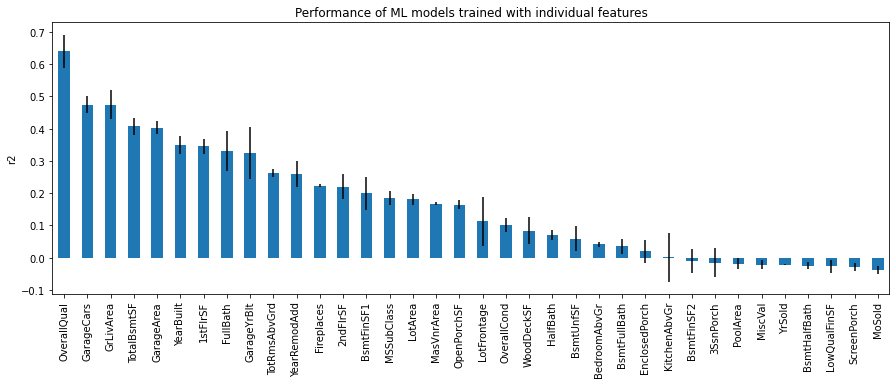

In [25]:
r = pd.concat([
    pd.Series(sel.feature_performance_),
    pd.Series(sel.feature_performance_std_)
], axis=1
)
r.columns = ['mean', 'std']

r['mean'].sort_values(ascending=False).plot.bar(yerr=[r['std'], r['std']], subplots=True, figsize=(15,5))

plt.title("Single feature model Performance")
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')
plt.show()

In [21]:
# the features that will be removed

len(sel.features_to_drop_)

35

In [22]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1022, 1), (438, 1))

**HOMEWORK**

Try selecting features using other metrics instead of the roc_auc and r2. Use for example the accuracy for classification and the neg_mean_squared_error, to become familiar with the use of this selector.